# Data Visualization with ggplot2

In [1]:
%%R
library(repr)
options(repr.plot.width=4, repr.plot.height=3)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected SPECIAL
1: %%
    ^


## Learning Objectives

* Understand the "grammar of graphics"
* Produce scatter plots, boxplots, bar graphs, and time series plots using ggplot.
* Set universal plot settings.
* Modify the aesthetics of an existing ggplot plot (including axis labels and color).
* Build complex and customized plots from data in a data frame.
--------------

We start by loading the required packages. `ggplot2` is included in the `tidyverse` package,  and is the current standard for data visualization in R.  Authored by Hadley Wickham, `gg` stands for "Grammar of Graphics."  In learning `ggplot2`, you may find the following [cheat sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) to be a helpful reference.

In [28]:
library(tidyverse)

## Overview

### Basic grammar

Hadley's Grammar of Graphics is outlined in detail in [this article](http://vita.had.co.nz/papers/layered-grammar.pdf).  Here, he illustrates his principles using a small data set similar to the following:

In [29]:
df <- data.frame(A = c(2,1,4,9),
                 B  = c(4,1,15,80),
                 C = c(1,2,3,4),
                 D = c('far','far','near','near'))
df %>% head(2)

A,B,C,D
<dbl>,<dbl>,<dbl>,<fct>
2,4,1,far
1,1,2,far


To visualize any data set using the Grammar of Graphics, it helps to understand the 3 components of which any graph is comprised:

1. Geoms
2. Scales
3. Data columns

 **Geoms** are the visual entities that we see on a graph. In the image below, we see three examples of geoms: a circular ***point***, a ***bar***, and a ***line***:
 
 ![](img/geoms.png)

**Scales** control how the **data columns** map to the aesthetic attributes of the geoms.  For example, is the point geom *yellow* or *blue*?  Is it *large* or *small*?  Is it *high* or *low*?  *Left* or *right*? These aesthetic attributes are respectively controlled by the **color**, **size**,  **y**, and **x** scales: 

![](img/scales.png)

Additional scales in `ggplot2` are:


* **shape**
* **linetype** (for the line geom)
* **fill** (for the bar and point geoms)

 

Any plot created with `ggplot2` requires these ingredients.  To create a plot, one must specify the desired geom; which data variables are to be aesthetically mapped to the geom; and the scales to use to control the mapping.  The skeleton of any `ggplot2` command is as follows; parts in italics are to be replaced with specific data variable names, geoms, and scales:


`ggplot(data = nameofdata) + geom_*nameofgeom*(aes(scale1 = variable1, scale2 = variable2))`

At a minimum, most geoms require the `x` scale.  



Let's begin by mapping `A` and `B` to the `point` geom on a Cartesian plane.  Note in `?geom_point` that two scales are required for aesthetic mappings to point geoms, **x** and **y**:

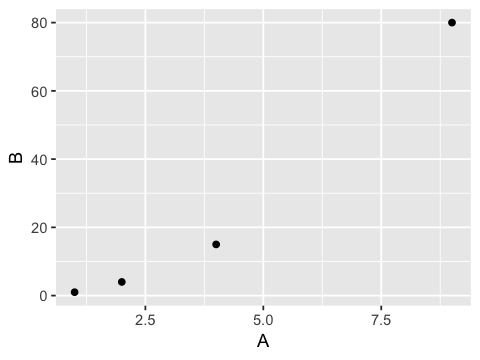

In [31]:
(ggplot(data = df) 
 + geom_point(aes(x = A,
                  y=B))
 )

We can employ other scales outside of aesthetic data mappings.  For example, if we want to change the aesthetic mapping of the above scatterplot by changing the **shape**, **color**, and **size** scale, we can do so with the following:

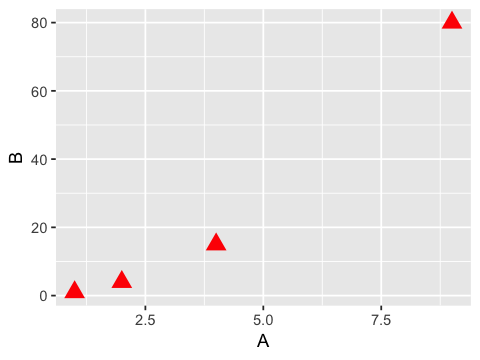

In [34]:
(ggplot(data = df) 
 + geom_point(aes(x = A,
                  y = B), 
              shape = 17,
              color='red',
              size=4)
 )

Notice in the above code that the scales that are not mapped to data are *outside* the `aes()` command.  

As an aside, looking at the `?shape` help file, we can find code to see all possible shapes:

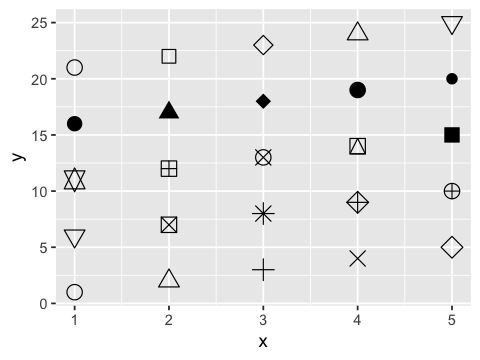

In [35]:
df2 <- data.frame(x = 1:5 , y = 1:25, z = 1:25)
(ggplot(df2, aes(x = x, y = y))
 +geom_point(aes(shape = z), 
             size = 4) 
 + scale_shape_identity()
 )

Now suppose we want to aesthetically map other variables with the **shape**, **color**, and **size** scales.  We must now put these specifications inside the `aes()` command and specify the variables we wish to map.  Consider the following code, and note the different looks, error messages and warnings that appear when attempting to apply aesthetic mappings using various scales depending on the data type. In `ggplot`-speak, "continuous" refers to quantitative data in general; while "discrete" refers to categorical data: 

#### Mapping continuous C with size:

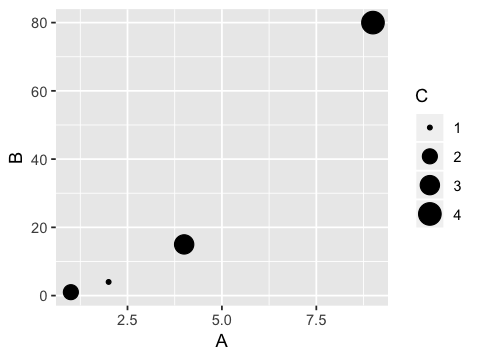

In [36]:
(ggplot(data = df) 
 +geom_point(aes(x = A,
                 y = B , 
                 size = C)))

#### Mapping continuous C with size and color:

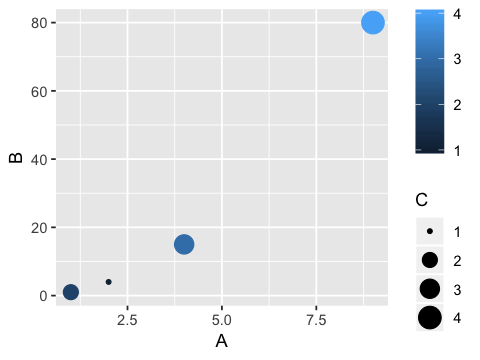

In [37]:
(ggplot(data = df) 
 +geom_point(aes(x = A,
                 y = B, 
                 size = C, 
                 color = C))
 )

#### Mapping continuous C with shape:

ERROR while rich displaying an object: Error: A continuous variable can not be mapped to shape

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. past

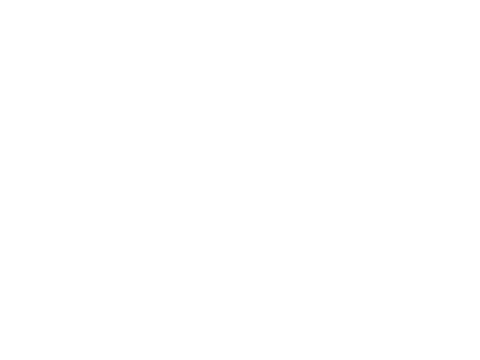

In [39]:
(ggplot(data = df) 
 + geom_point(aes(x = A,
                 y = B, 
                 shape = C)
             )
 )

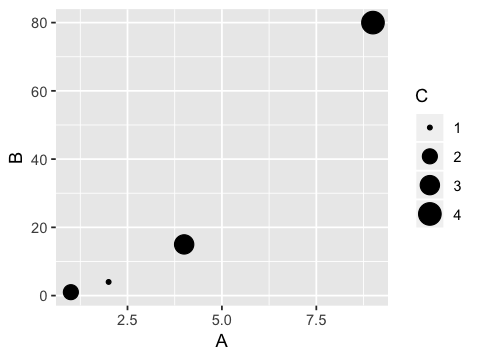

In [40]:
ggplot(data = df) + geom_point(aes(x = A,y=B, size = C))

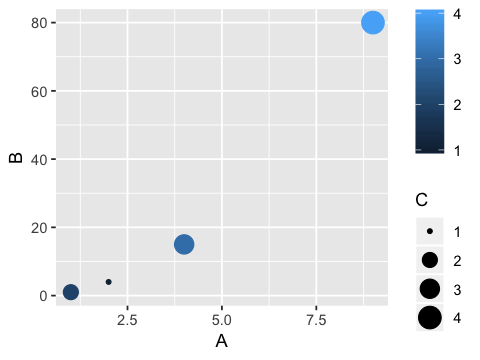

In [41]:
ggplot(data = df) + geom_point(aes(x = A,y=B, size = C, color = C))

## <font color="red"> Challenge </font>

Re-create the following plots:

#### Plot 1

<img src="./img/challenge1.png" width=300/>

In [49]:
# Your code here

#### Plot 2

<img src="./img/challenge2.png" width=300/>

In [49]:
# Your code here

#### Plot 3

<img src="./img/challenge3.png" width=300/>

In [49]:
# Your code here

#### Plot 4

<img src="./img/challenge4.png" width=300/>

In [49]:
# Your code here

## <font color="blue"> Key </font>

# Plot 1
ggplot(data = df) + geom_point(aes(x = A,y=B, shape = D), size = 4)

# Plot 2
ggplot(data = df) + geom_point(aes(x = A,y=B, color = D), size = 4)

# Plot 3
ggplot(data = df) + geom_point(aes(x = A,y=B, shape = D,color=D), size = 4)

# Plot 4
ggplot(data = df) + geom_point(aes(x = A,y=B, shape = D,color=D,size=C))

Note some interesting concepts illustrated here:

* *Continuous* (numeric, quantitative) variables should be mapped using **size** or **color** scales; these are the scales that can encode quantity.
* *Discrete* (categorical) variables should be mapped with **shape** or **color** scales; these are the scales that are best used for indicating "categories."  

## Layers

A very important aspect of the `ggplot2` package is the idea of *layers*.  Aesthetic mappings to different geoms can take place simply by specifying additional mappings with a `+` sign.  For example, suppose we want to create the above scatterplots with points *and* lines.  This requires two aesthetic mappings: one from the data to the points geom, and one from the data to the lines geom.  We can see this in what follows.  Note that because both `geom_point()` and `geom_line()` rely on the same aesthetic mapping, we could simplify the code by specifiying the appropriate mapping in the initial `ggplot()` command. The following two lines of code are equivalent:

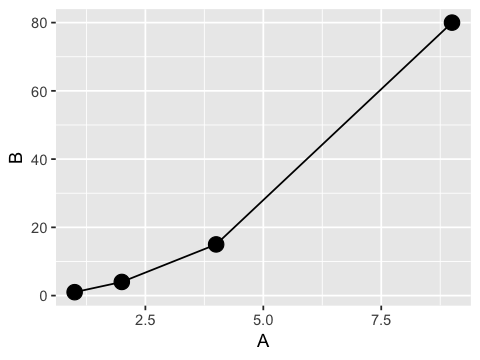

In [53]:
ggplot(data = df) + geom_point(aes(x = A,y=B), size = 4) + geom_line(aes(x = A,y=B))

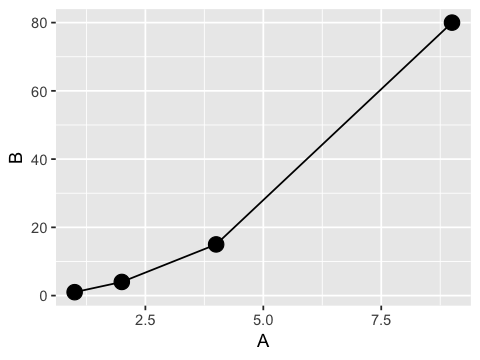

In [54]:
ggplot(aes(x = A, y = B), data = df) + geom_point(size = 4) + geom_line()

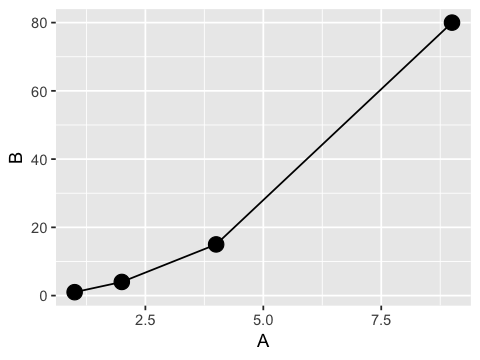

In [55]:
ggplot(data = df) + geom_point(aes(x = A,y=B), size = 4) + geom_line(aes(x = A,y=B))

In [ ]:
> ###Challenge  
> Re-create the following plots.  What happens if you try to map 
> variable `C` to `geom_line()` using the **size** scale?
```{r,recreate5, warning=FALSE,fig.height = 3, fig.width=4.5,echo=FALSE}
ggplot(data = df) + geom_point(aes(x = A,y=B,shape=D,color=D), size = 5) + geom_line(aes(x = A,y=B),size=2)
```
```{r,recreate6, warning=FALSE,fig.height = 3, fig.width=4.5,echo=FALSE}
ggplot(data = df) +  geom_line(aes(x = A,y=B),size=2) + geom_point(aes(x = A,y=B,shape=D,color=D), size = 5)
```
```{r,recreate7,warning=FALSE,fig.height = 3, fig.width=4.5,echo=FALSE}
ggplot(data = df)  + geom_line(aes(x = A,y=B,color=D),size=2)+ geom_point(aes(x = A,y=B,shape=D), size = 4)
```
```{r,recreate8,warning=FALSE,fig.height = 3, fig.width=4.5,echo=FALSE}
ggplot(data = df)  + geom_line(aes(x = A,y=B,linetype=D,color=D),size=2)+ geom_point(aes(x = A,y=B,shape=D), size = 4)
```

In [2]:
fake_data <- data.frame(Factor1 = rep(c('I','II','III'),3),Factor2 = rep(c('A','B','C'),each=3),Response = c(15,5,5,10,15,15,5,10,10))
fake_data

Factor1,Factor2,Response
<fct>,<fct>,<dbl>
I,A,15
II,A,5
III,A,5
I,B,10
II,B,15
III,B,15
I,C,5
II,C,10
III,C,10
